In [66]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle


In [67]:
result_file = open("results_exp.pkl", "rb")
results = pickle.load(result_file)

In [68]:
labels_trace = [trace for trace in results]
custom_results = [ missrate['custom'] for missrate in results.values() ]
gshare_results = [ missrate['gshare'] for missrate in results.values() ]
tourn_results = [ missrate['tourn'] for missrate in results.values() ]

print(custom_results)

[0.83, 0.37, 6.44, 0.3, 0.86, 5.27]


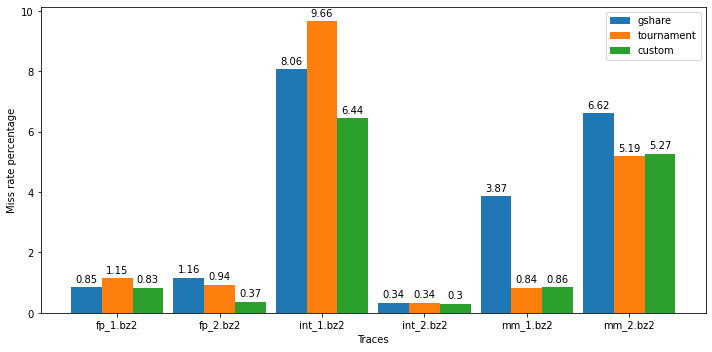

In [69]:

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels_trace))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
bar_gshare = ax.bar(x - width, gshare_results, width, label='gshare')
bar_tourn = ax.bar(x, tourn_results, width, label='tournament')
bar_custom = ax.bar(x + width, custom_results, width, label='custom')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Miss rate percentage')
ax.set_xlabel('Traces')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels_trace)
ax.legend()

ax.bar_label(bar_gshare, padding=3)
ax.bar_label(bar_tourn, padding=3)
ax.bar_label(bar_custom, padding=3)

fig.tight_layout()

plt.show()

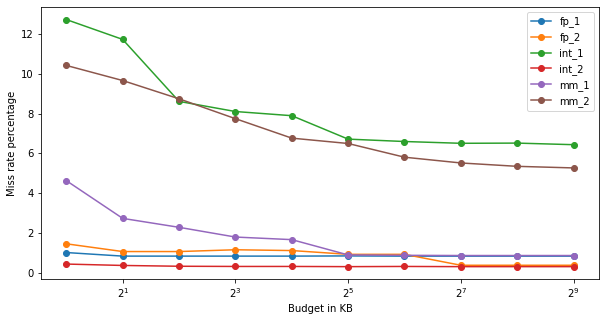

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))

for trace, trace_results in results.items():
    # plot custom_vary
    x = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
    y = trace_results['custom_vary']
    ax.plot(x,y, '-o', label=trace[:-4])
    ax.set_ylabel('Miss rate percentage')
    ax.set_xlabel('Budget in KB')
    ax.set_xscale('log', base=2)
    ax.legend()


i: 8 budget: 1.251953125
i: 9 budget: 2.501953125
i: 10 budget: 5.001953125
i: 11 budget: 10.001953125
i: 12 budget: 20.001953125
i: 13 budget: 40.001953125
i: 14 budget: 80.001953125
i: 15 budget: 160.001953125
i: 16 budget: 320.001953125
i: 17 budget: 640.001953125


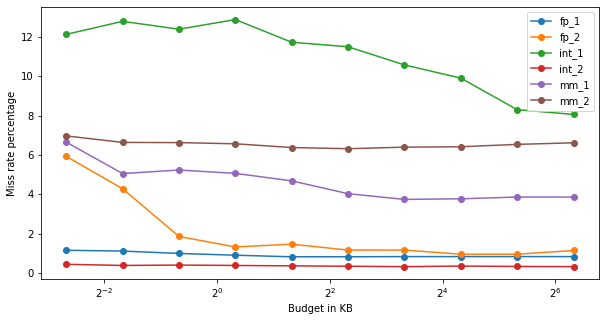

In [71]:
x = []
for i in range(8, 18):
    g_size = i + 1
    l_size = i + 1
    pc_index = i
    budget  = 2+(2**g_size)+(2**l_size)+(2**pc_index)
    print('i: ' + str(i) + ' budget: '  + str(budget/1024))
    x.append(budget/(1024*8))

fig, ax = plt.subplots(figsize=(10, 5))

for trace, trace_results in results.items():
    # plot gshare_vary
    y = trace_results['gshare_vary']
    ax.plot(x,y, '-o', label=trace[:-4])
    ax.set_ylabel('Miss rate percentage')
    ax.set_xlabel('Budget in KB')
    ax.set_xscale('log', base=2)
    ax.legend()


i: 9 budget: 1.0087890625
i: 10 budget: 2.009765625
i: 11 budget: 4.0107421875
i: 12 budget: 8.01171875
i: 13 budget: 16.0126953125
i: 14 budget: 32.013671875
i: 15 budget: 64.0146484375
i: 16 budget: 128.015625
i: 17 budget: 256.0166015625
i: 18 budget: 512.017578125


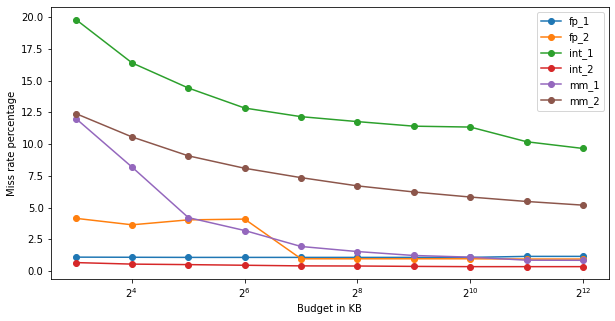

In [72]:
x = []
for i in range(9,19):
    budget = i +2**(i+1)
    print('i: ' + str(i) + ' budget: '  + str(budget/1024))
    x.append(budget/1024*8)

fig, ax = plt.subplots(figsize=(10, 5))

for trace, trace_results in results.items():
    # plot gshare_vary
    y = trace_results['tourn_vary']
    ax.plot(x,y, '-o', label=trace[:-4])
    ax.set_ylabel('Miss rate percentage')
    ax.set_xlabel('Budget in KB')
    ax.set_xscale('log', base=2)
    ax.legend()


In [73]:
bdgt = 4 *1024*8
h = 28
theta = 1.93*h+14
print(theta)
table_size = (bdgt-h)/((math.log2(theta)+1)*h)
print(table_size)

68.03999999999999
164.95970272376468
